In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from easymore import Easymore
import numpy as np
import rasterio
from rasterio.plot import show

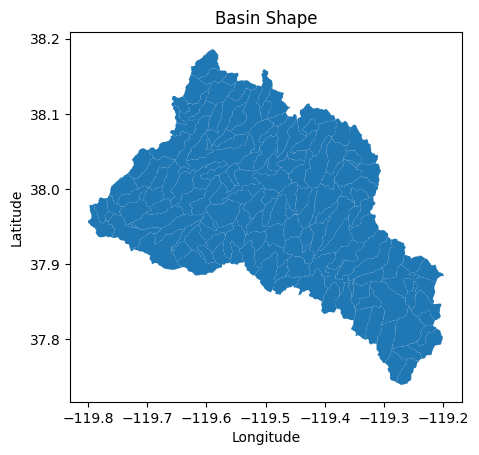

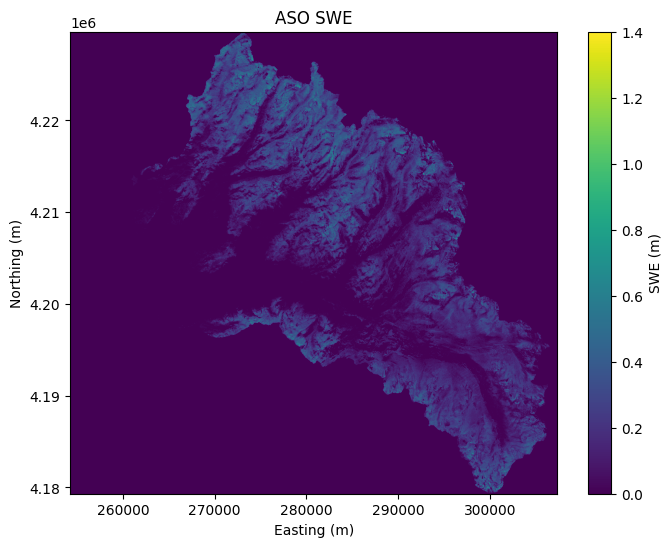

In [9]:
#Visualistation of basin shape file and ASO raster.


# Path to basin shapefile
basin_shp = "proj/snow_proj/basins/hydrofabrics/USCATB_hydrofabric.shp"

# Read the basin shapefile
basin_data = gpd.read_file(basin_shp)

# Reproject the basin shapefile to EPSG:4326 (WGS84)
basin_data_wgs84 = basin_data.to_crs('EPSG:4326')

# Plot the reprojected basin shapefile
basin_data_wgs84.plot()
plt.title("Basin Shape")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



# Path to the raster file you wish to display
raster_filepath = 'proj/snow_proj/basins/ASO_basins/CA/ASO_50M_SWE_USCATB_20150305.tif'

# Open the raster file
with rasterio.open(raster_filepath) as src:
    # Display the raster
    fig, ax = plt.subplots(figsize=(8, 6))
    show(src, cmap='viridis', ax=ax)
    # Add colorbar
    cbar = plt.colorbar(ax.get_images()[0], ax=ax)
    cbar.set_label('SWE (m)')
    # Add axes labels
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    ax.set_title('ASO SWE')
    #plt.savefig('Taylor River ASO Basin 50m.png')
    plt.show()

In [10]:
#Reprojecting raster into shp file crs

import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS

# Path to the original .tif file
original_tif_path = 'proj/snow_proj/basins/ASO_basins/CA/ASO_50M_SWE_USCATB_20150305.tif'

# Path to save the reprojected .tif file
reprojected_tif_path = 'proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.tif'

# Define the target CRS as WGS84 (latitude/longitude)
target_crs = CRS.from_epsg(4326)

# Open the original .tif file
with rasterio.open(original_tif_path) as src:
    # Get the profile of the original raster
    src_profile = src.profile
    
    # Calculate the transform and dimensions for the reprojected raster
    transform, width, height = calculate_default_transform(src.crs, target_crs, src.width, src.height, *src.bounds)
    
    # Update the profile with the new CRS, transform, and dimensions
    dst_profile = src.profile.copy()
    dst_profile.update({
        'crs': target_crs,
        'transform': transform,
        'width': width,
        'height': height,
        'nodata': -9999  # Optional: Set nodata value
    })
    
    # Create a new raster file for the reprojected data
    with rasterio.open(reprojected_tif_path, 'w', **dst_profile) as dst:
        # Reproject the data from the original raster to the new raster
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=target_crs,
            resampling=Resampling.nearest
        )

print("Reprojection complete. The reprojected raster is saved as:", reprojected_tif_path)


Reprojection complete. The reprojected raster is saved as: proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.tif


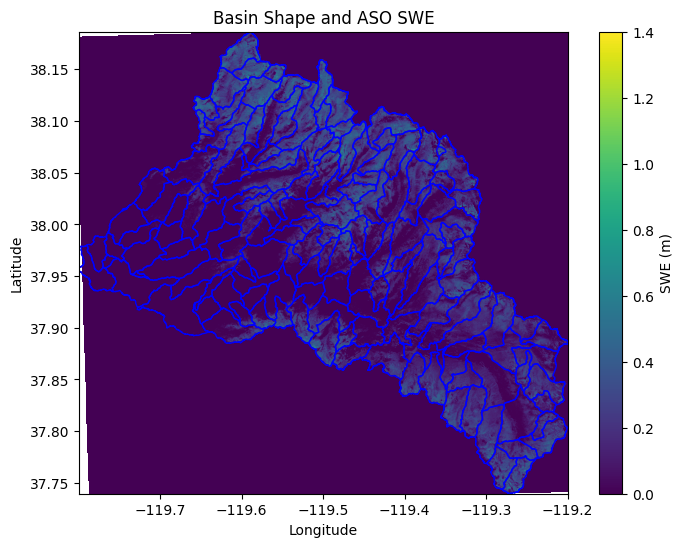

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Path to the original basin shapefile
basin_shp = "proj/snow_proj/basins/hydrofabrics/USCATB_hydrofabric.shp"

# Read the basin shapefile
basin_data = gpd.read_file(basin_shp)

# Reproject the basin shapefile to EPSG:4326 (WGS84)
basin_data_wgs84 = basin_data.to_crs('EPSG:4326')

# Path to save the reprojected shapefile
reprojected_basin_shp = "proj/snow_proj/basins/hydrofabrics/USCATB_hydrofabric_reprojected.shp"

# Save the reprojected shapefile
basin_data_wgs84.to_file(reprojected_basin_shp, driver='ESRI Shapefile')

# Verify the saved shapefile by reading it again
reprojected_basin_data = gpd.read_file(reprojected_basin_shp)

# Get the bounding box of the reprojected basin shapefile
basin_bounds = reprojected_basin_data.total_bounds

# Path to the raster file
raster_filepath = 'proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.tif'

# Open the raster file
with rasterio.open(raster_filepath) as src:
    # Create a new plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the raster first
    show(src, cmap='viridis', ax=ax)
    cbar = plt.colorbar(ax.get_images()[0], ax=ax)
    cbar.set_label('SWE (m)')
    
    # Plot the reprojected basin shapefile on top
    reprojected_basin_data.plot(ax=ax, color='none', edgecolor='blue')  # Plot the outline of the basin
    
    ax.set_title("Basin Shape and ASO SWE")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    
    # Set the extent of the plot to match the bounding box of the reprojected basin shapefile
    ax.set_xlim(basin_bounds[0], basin_bounds[2])
    ax.set_ylim(basin_bounds[1], basin_bounds[3])

plt.show()


In [12]:
import rasterio
import numpy as np

# Path to the raster file
raster_filepath = 'proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.tif'

# Open the raster file
with rasterio.open(raster_filepath) as src:
    # Print the raster metadata
    print("Raster Metadata:")
    print(src.profile)
    print("\n")
    
    # Print the raster dimensions
    print("Raster Dimensions:")
    print(src.width, "x", src.height)
    print("\n")
    
    # Print the raster coordinate reference system (CRS)
    print("Raster CRS:")
    print(src.crs)
    print("\n")
    
    # Print the raster transform (geotransform)
    print("Raster Transform:")
    print(src.transform)
    print("\n")
    
    # Read the raster data into a numpy array
    raster_data = src.read(1)  # Assuming it's a single-band raster
    
    # Print information about the raster values
    print("Raster Data:")
    print("Shape:", raster_data.shape)
    print("Data Type:", raster_data.dtype)
    print("No Data Value:", src.nodatavals)
    print("\n")
    
    # Calculate summary statistics
    print("Summary Statistics:")
    print("Minimum:", np.nanmin(raster_data))
    print("Maximum:", np.nanmax(raster_data))
    print("Mean:", np.nanmean(raster_data))
    print("Median:", np.nanmedian(raster_data))
    print("Standard Deviation:", np.nanstd(raster_data))
    print("\n")


Raster Metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1193, 'height': 898, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0005192846472701313, 0.0, -119.80575467105511,
       0.0, -0.0005192846472701313, 38.194354210630536), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


Raster Dimensions:
1193 x 898


Raster CRS:
EPSG:4326


Raster Transform:
| 0.00, 0.00,-119.81|
| 0.00,-0.00, 38.19|
| 0.00, 0.00, 1.00|


Raster Data:
Shape: (898, 1193)
Data Type: float32
No Data Value: (-9999.0,)


Summary Statistics:
Minimum: -9999.0
Maximum: 1.4008684
Mean: -515.0806
Median: 0.0
Standard Deviation: 2210.3088




In [13]:
#Creating time string

import os
from datetime import datetime

# File name
file_name = 'proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.tif'

# Extract date from file name
date_str = file_name.split('_')[-2]

# Convert date string to datetime object
date = datetime.strptime(date_str, '%Y%m%d')

# Format date as required for netCDF time variable (e.g., days since a specific date)
reference_date = datetime(1900, 1, 1)
time_since_reference = (date - reference_date).days

# Print the date and time since reference date
print("Date:", date)
print("Time since reference date (days):", time_since_reference)


Date: 2015-03-05 00:00:00
Time since reference date (days): 42066


In [14]:
import numpy as np
import rasterio
from netCDF4 import Dataset, date2num
import cftime
from datetime import datetime

# File name
file_name = 'proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.tif'

# Extract date from file name
date_str = file_name.split('_')[6]
date = datetime.strptime(date_str, '%Y%m%d')

# Convert date to cftime datetime object
cftime_date = cftime.datetime(date.year, date.month, date.day, calendar='gregorian')

# Open the raster file
with rasterio.open(file_name) as src:
    # Read the raster data
    data = src.read(1)
    transform = src.transform
    crs = src.crs
    nodata = src.nodata

    # Generate coordinates
    cols, rows = np.meshgrid(np.arange(src.width), np.arange(src.height))
    lon, lat = rasterio.transform.xy(transform, rows, cols)
    lon = np.array(lon)
    lat = np.array(lat)

# Debugging: Print shapes of lon and lat arrays
print(f'lon shape: {lon.shape}, lat shape: {lat.shape}')

# Define the netCDF file
nc_file = 'proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.nc'

# Create a netCDF dataset
with Dataset(nc_file, 'w', format='NETCDF4') as nc:
    # Create dimensions
    lat_dim = nc.createDimension('lat', lat.shape[0])
    lon_dim = nc.createDimension('lon', lon.shape[1])
    time_dim = nc.createDimension('time', None)  # Unlimited time dimension

    # Create variables
    lat_var = nc.createVariable('lat', 'f4', ('lat',))
    lon_var = nc.createVariable('lon', 'f4', ('lon',))
    time_var = nc.createVariable('time', 'f4', ('time',))
    swe_var = nc.createVariable('SWE', 'f4', ('time', 'lat', 'lon',), fill_value=nodata)
    
    # Set variable attributes
    lat_var.units = 'degrees_north'
    lon_var.units = 'degrees_east'
    time_var.units = 'days since 1900-01-01 00:00:00'
    time_var.calendar = 'gregorian'
    time_var.long_name = 'time'
    swe_var.units = 'm'
    swe_var.long_name = 'Snow Water Equivalent'
    
    # Write data to variables
    lat_var[:] = lat[:, 0]  # Extract latitude values (all rows of the first column)
    lon_var[:] = lon[0, :]  # Extract longitude values (all columns of the first row)
    time_var[0] = date2num(cftime_date, units=time_var.units, calendar=time_var.calendar)
    swe_var[0, :, :] = data

print(f'NetCDF file created: {nc_file}')


lon shape: (898, 1193), lat shape: (898, 1193)
NetCDF file created: proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.nc


In [2]:
from netCDF4 import Dataset

# Path to the NetCDF file
raster_filepath = 'proj/snow_proj/basins/ASO_basins/CA/reprojected/ASO_50M_SWE_USCATB_20150305_reproj.nc'

# Open the NetCDF file
nc_file = Dataset(raster_filepath, 'r')

# Print variable names and their attributes
for var_name in nc_file.variables:
    print("Variable:", var_name)
    print("Attributes:")
    for attr_name in nc_file.variables[var_name].ncattrs():
        print(f"    {attr_name}: {nc_file.variables[var_name].getncattr(attr_name)}")

# Close the NetCDF file
nc_file.close()


Variable: lat
Attributes:
    units: degrees_north
Variable: lon
Attributes:
    units: degrees_east
Variable: time
Attributes:
    units: days since 1900-01-01 00:00:00
    calendar: gregorian
    long_name: time
Variable: SWE
Attributes:
    _FillValue: -9999.0
    units: m
    long_name: Snow Water Equivalent
